### Итоговая работа по курсу 

__Математика для Data Science__ 

студента Помойницкого Евгения, группа DS8

In [305]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from math import cos, sin, pi, tan
from scipy.misc import derivative
from scipy import linalg
from numpy.random import choice
from scipy.optimize import minimize

### Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [306]:
raitings = [[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
            [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
            [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
            [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
            [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
            [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
            [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
            [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
            [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
            [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]]

<b> a) </b> Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

**Решение:** создадим функцию, которая будет брать заданный индексом вектор из поданной на вход матрицы и перебирать все векторы, сравнивая по косинусному расстоянию с заданным.

In [307]:
def cos_dist(matrix, i):
    """Takes arguments as matrix and given index of vector in this matrix. 
    Iterates through matrix checking cosine distance and returns a) index of vector with maximum cosine distance 
    and b) the cosine distance itself as float"""
    m0 = matrix[i]
    ab_cos = []
    elem_max = 0
    elem_index = 0
    for j in range(len(matrix)):
        prod = np.dot(m0, matrix[j])
        a = [x**2 for x in matrix[j]]
        b = [y**2 for y in m0]
        if matrix[j] != m0:
            if elem_max > ( prod / (pow(sum(a),0.5) * pow(sum(b),0.5))):
                elem_max = elem_max
                elem_index = elem_index
            else:
                elem_max = ( prod / (pow(sum(a),0.5) * pow(sum(b),0.5)))
                elem_index = j
    return elem_index, elem_max

Теперь запустим функцию по данной нам матрице. Чтобы вывод был более наглядным, выведем не значения векторов, а их индексы.

In [308]:
for ind in range(len(raitings)):
    print("for vector index {} the closes is vector index {} with cos dist {}".format(
        ind, cos_dist(raitings, ind)[0], cos_dist(raitings, ind)[1]))

for vector index 0 the closes is vector index 8 with cos dist 0.9106598233573044
for vector index 1 the closes is vector index 4 with cos dist 0.8713805223930228
for vector index 2 the closes is vector index 9 with cos dist 0.9187305147356807
for vector index 3 the closes is vector index 9 with cos dist 0.8588686958710952
for vector index 4 the closes is vector index 8 with cos dist 0.8794847716076252
for vector index 5 the closes is vector index 9 with cos dist 0.8551490764118892
for vector index 6 the closes is vector index 3 with cos dist 0.832742107055763
for vector index 7 the closes is vector index 5 with cos dist 0.8445168512565341
for vector index 8 the closes is vector index 0 with cos dist 0.9106598233573044
for vector index 9 the closes is vector index 2 with cos dist 0.9187305147356807


<b> b) </b>Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

### Задание 2

Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ на python и на бумаге (просто подставить точку в производную и ничего не упрощать).

По правилу дифференцирования сложных функций:
$(tg^2(sin(x) + cos(2x+3)))'=$
$2*(tg(sin(x) + cos(2x+3)))*(1/(cos^2(sin(x) + cos(2x+3))))*(cos(x) - 2sin(2x+3))$

Подставляя $x_0=1$ получаем:
$2*(tg(sin(1) + cos(2+3)))*(1/(cos^2(sin(1) + cos(2+3))))*(cos(1) - 2sin(2+3))=$
$2*(tg(0.8415 + 0.2837) * (1/( cos^2(0.8415 + 0.2837) ) * (0.5403 - (-1.9178))=$
$2*2.0936 * (1/0.1858) * 2.4581=$
$55.3959$

In [309]:
def func(x):
    return pow((tan(sin(x) + cos(2 * x + 3))),2)

In [310]:
x0 = 1.0
derivative(func, x0, dx=1e-6)

55.3859176464222

### Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку <b>error</b>

In [311]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

In [312]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [313]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
       1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
       2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
       3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [314]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
        -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
        19.22059845,   9.48411207,  -3.22273056, -13.48576488,
       -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
        22.12489421,  24.20292139,  18.04522521,   6.33211092])

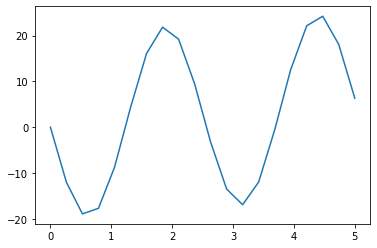

In [315]:
plt.plot(x, fx)
plt.show()

In [316]:
def error(params): 
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [317]:
print (error([0,0]))

244.50954835


In [318]:
res = minimize(error, [1,1], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

print({res.fun: list(res.x)})

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 109
         Function evaluations: 207
{228.35671969694644: [1.9528258541172778, 1.5662520794612407]}


In [319]:
points = list(np.linspace(1,20,20))

In [320]:
res_list={}

for point in points:
    for ppoint in points:
        res = minimize(error, [point, ppoint], method='nelder-mead', options={'xtol': 1e-8, 'disp': True})
        val=res.fun
        res_list[val] = list(res.x)

Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 109
         Function evaluations: 207
Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 97
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 237.955663
         Iterations: 97
         Function evaluations: 182
Optimization terminated successfully.
         Current function value: 244.203962
         Iterations: 157
         Function evaluations: 298
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 89
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 84
         Function evaluations: 163
Optimization terminated successfully.
         Current function value: 244.130357
         Iterations: 120
         Function evaluations: 231
Optimizati

Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 70
         Function evaluations: 138
Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 101
         Function evaluations: 190
Optimization terminated successfully.
         Current function value: 237.955663
         Iterations: 149
         Function evaluations: 286
Optimization terminated successfully.
         Current function value: 237.955663
         Iterations: 101
         Function evaluations: 193
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 102
         Function evaluations: 192
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 95
         Function evaluations: 181
Optimization terminated successfully.
         Current function value: 242.782362
         Iterations: 145
         Function evaluations: 284
Optimizati

Optimization terminated successfully.
         Current function value: 232.958621
         Iterations: 88
         Function evaluations: 171
Optimization terminated successfully.
         Current function value: 237.836410
         Iterations: 105
         Function evaluations: 195
Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 104
         Function evaluations: 196
Optimization terminated successfully.
         Current function value: 237.955663
         Iterations: 113
         Function evaluations: 218
Optimization terminated successfully.
         Current function value: 244.203963
         Iterations: 120
         Function evaluations: 226
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 137
         Function evaluations: 264
Optimization terminated successfully.
         Current function value: 237.836411
         Iterations: 102
         Function evaluations: 189
Optimiz

Optimization terminated successfully.
         Current function value: 242.782362
         Iterations: 121
         Function evaluations: 234
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 89
         Function evaluations: 176
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 81
         Function evaluations: 162
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 88
         Function evaluations: 170
Optimization terminated successfully.
         Current function value: 232.958619
         Iterations: 147
         Function evaluations: 278
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 90
         Function evaluations: 177
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 75
         Function evaluations: 148
Optimization terminat

Optimization terminated successfully.
         Current function value: 241.474708
         Iterations: 107
         Function evaluations: 212
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 82
         Function evaluations: 159
Optimization terminated successfully.
         Current function value: 242.826682
         Iterations: 113
         Function evaluations: 221
Optimization terminated successfully.
         Current function value: 0.000028
         Iterations: 87
         Function evaluations: 169
Optimization terminated successfully.
         Current function value: 228.356720
         Iterations: 114
         Function evaluations: 213
Optimization terminated successfully.
         Current function value: 244.509548
         Iterations: 41
         Function evaluations: 144
Optimization terminated successfully.
         Current function value: 244.203962
         Iterations: 145
         Function evaluations: 271
Optimization 

Optimization terminated successfully.
         Current function value: 241.474708
         Iterations: 118
         Function evaluations: 232
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 95
         Function evaluations: 190
Optimization terminated successfully.
         Current function value: 214.510328
         Iterations: 102
         Function evaluations: 194
Optimization terminated successfully.
         Current function value: 232.958619
         Iterations: 197
         Function evaluations: 374
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 90
         Function evaluations: 174
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 76
         Function evaluations: 145
Optimization terminated successfully.
         Current function value: 242.826682
         Iterations: 149
         Function evaluations: 288
Optimization te

Optimization terminated successfully.
         Current function value: 241.474708
         Iterations: 115
         Function evaluations: 220
Optimization terminated successfully.
         Current function value: 0.000013
         Iterations: 80
         Function evaluations: 156
Optimization terminated successfully.
         Current function value: 242.826682
         Iterations: 111
         Function evaluations: 210
Optimization terminated successfully.
         Current function value: 214.510329
         Iterations: 127
         Function evaluations: 243


In [321]:
res_list

{228.35671969694644: [1.9528258657488886, 1.566252072869431],
 228.35671969694647: [1.9528258863322125, 1.5662520612045476],
 237.95566302816798: [1.9627307441878565, 3.328483567730872],
 244.20396237879734: [1.7306378180198947, 4.496507364103833],
 242.82668046443519: [2.0914477653668984, 5.05960385507567],
 237.8364105739557: [1.226226192223034, 6.363493739642216],
 237.8364105650418: [1.226226181125167, 6.363493740796208],
 244.13035704980663: [1.6540443784358667, 8.267717826658993],
 242.78236215012973: [1.4760504042440714, 10.114966306307583],
 242.78236215146265: [1.476050405633047, 10.114966305071615],
 232.9586189489899: [1.6083118696552634, 11.363731668101286],
 232.95861894967578: [1.608311865453858, 11.363731668376237],
 214.51032802620173: [2.0931942142516444, 16.36927920240308],
 242.58571581095933: [1.2889794819856968, 15.050371216969289],
 242.5857158109593: [1.2889794847006453, 15.050371214062107],
 214.51032802369673: [2.093194217374573, 16.369279202009846],
 214.51032

Можно было бы анализировать полученный словарь методами Пайтона, чтобы найти минимум, но, в выводе виден ответ - значения **(a,b)** соответственно **(3, 21.4)**

### Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [322]:
v = np.random.randint(1,10,20)
print("дискретная случайная величина v = {} имеющая {} значений".format(v, len(v)))

дискретная случайная величина v = [3 4 3 3 1 7 2 9 2 1 1 2 8 9 2 9 2 2 6 3] имеющая 20 значений


In [323]:
print("Среднее значение величины v: {}, среднее значение одной произвольной выборки размера 50: {}".format(
    v.mean(), np.random.choice(v, 50).mean() ))

Среднее значение величины v: 3.95, среднее значение одной произвольной выборки размера 50: 4.22


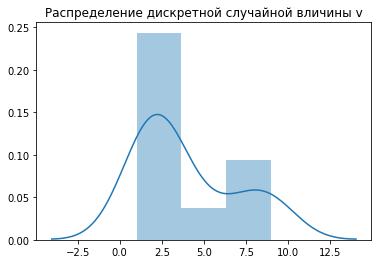

In [324]:
sns.distplot(v)
plt.title("Распределение дискретной случайной вличины v")
plt.show()

Запустим 1000 выборок размера 50 и соберем средние выборок в список **arr**

In [325]:
arr=[]
for i in range(1000):
    arr.append(np.random.choice(v, 50).mean())

Отобразим распеределение средних графически. Нагляднее использовать не **plt.hist()** а **sns.distplot()** который кроме гистограммы отображает еще огибающую.

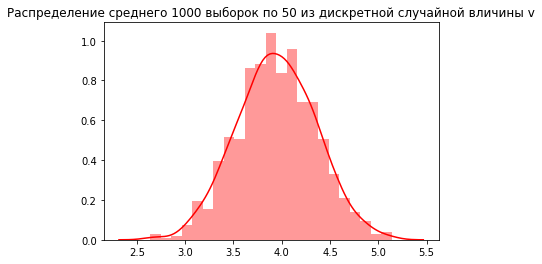

In [326]:
sns.distplot(arr, color='r')
plt.title("Распределение среднего 1000 выборок по 50 из дискретной случайной вличины v")
plt.show()

### Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге)

[[1, 4],

 [1, 1]]

Подставляем в определитель матрицы:
$$ (1-x)(1-x) - 4 = 0 $$
$$ x^2-2x+1-4 = 0 $$
$$ x^2-2x-3 = 0 $$
$$ D = 4+12 = 16 $$
$$ x_1= 3 $$
$$ x_2= -1 $$

Находимо собственный вектор для собственного значения -3. Подставляя в матрицу собственное значение, получаем систему уравнений:
$$ -2x + 4y = 0 $$
$$ x - 2y = 0 $$
откуда:
$ x = 2y $
На основании принятых практики выбора значений координат собственного вектора, получаем:
$(2, 1)$

Находимо собственный вектор для собственного значения 1. Подставляя в матрицу собственное значение, получаем систему уравнений:
$$ 2x + 4y = 0 $$
$$ x + 2y = 0 $$
откуда:
$ x = - 2y $
На основании принятых практики выбора значений координат собственного вектора, получаем:
$(2,-1)$

In [327]:
m = np.array([[1, 4], [1, 1]])
m

array([[1, 4],
       [1, 1]])

Выполним проверку найденных "руками" собственных значений и векторов:

In [328]:
np.dot(m,[2,1])/3

array([2., 1.])

In [329]:
np.dot(m,[2,-1])/-1

array([ 2., -1.])

Найденные собственные значения и собственные векторы правильные по опредедению собственных значений и векторов.

Теперь найдем собственные значения и собственне векторы с помощью встроенных функций библиотеки **linalg**

In [330]:
w, v = np.linalg.eig(m)

In [331]:
for i in range(len(m)):
    print("собственое значение {}, его собственный вектор {}".format(w[i], v[:,i]))

собственое значение 3.0000000000000004, его собственный вектор [0.89442719 0.4472136 ]
собственое значение -0.9999999999999996, его собственный вектор [-0.89442719  0.4472136 ]


Выполним проверку найденных значений, достаточно проверить одно из них:

In [332]:
w[0]*v[:,0]

array([2.68328157, 1.34164079])

In [333]:
np.dot(m,v[:,0])

array([2.68328157, 1.34164079])

Найденные собственные значения и собственные векторы правильные по опредедению собственных значений и векторов. Мы видим, что найденные "руками" собственные значения соответствуют найденным функцией **linalg.eig** с точностью округления. Собственные векторы функция выбирает в нормализованном виде, видно, что они коллинеарны найденным "руками"